In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

df = pd.read_csv('C:/Users/NSC/Desktop/ADABOOST/interferon.csv', delimiter=';', encoding = "ISO-8859-1")
df.dataframeName = 'C:/Users/NSC/Desktop/ADABOOST/interferon.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

#na_percent = (df.isnull().sum()/len(df))[(df.isnull().sum()/len(df))>0].sort_values(ascending=False)
na_percent = (df.isnull().sum()/len(df))[(df.isnull().sum()/len(df))>0].sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':na_percent*100})
missing_data


There are 210 rows and 14 columns


,Missing Percentage
Ag normalized,2.380952
Registry,1.904762
Group,1.904762
IFNG+874,1.904762
unstimulated IFN-y pg/ml,1.904762
PHA IFN-y pg/ml,1.904762
Ag IFN-y pg/ml,1.904762
CD3+ number,1.904762
PHA normalized,1.904762
IGRA result,1.904762


Text(0.5, 1.0, 'Percentage Missing')

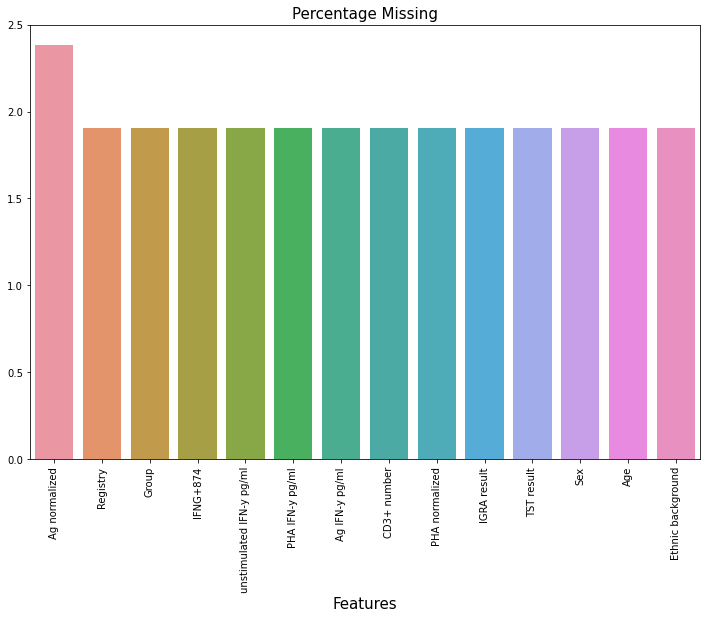

In [2]:
#Creating a Visualization of every feature with missing values

na = (df.isnull().sum() / len(df)) * 100
na = na.drop(na[na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=na.index, y=na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.title('Percentage Missing', fontsize=15)

In [4]:
#Imputing Features which are numerical with 0 and 'None' for categorical


for col in ['Group', 'IFNG+874', 'IGRA result', 'TST result', 'Sex', 'Ethnic background']:
    df[col] = df[col].fillna('None')

for col in ('Ag normalized', 'PHA normalized', 'CD3+ number', 'Ag IFN-y pg/ml', 'PHA IFN-y pg/ml', 'unstimulated IFN-y pg/ml', 'Registry' ):
    df[col] = df[col].fillna(df[col].mode()[0])

#for col in ['Age']:
#    df[col] = df[col].fillna(0)
#get back when finish


In [5]:
categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and 
                    df[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

In [6]:
print(categorical_cols)

['Group', 'IFNG+874', 'IGRA result', 'TST result', 'Sex', 'Ethnic background']


In [7]:
print(numerical_cols)

['Age']


C:\Users\NSC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



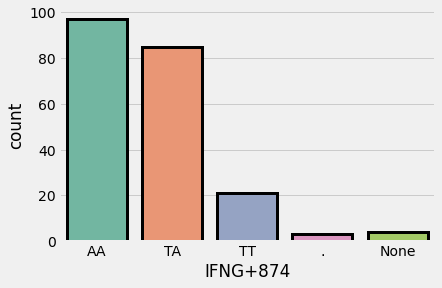

In [8]:
plt.style.use('fivethirtyeight')
sns.countplot(df['IFNG+874'],linewidth=3,palette="Set2",edgecolor='black')
plt.show()

In [9]:
#Label Encoding. 
#Our dataset cannot run with categorical columns so we must Label Encode these columns in order to make them numerical.
from sklearn.preprocessing import LabelEncoder
categorical_col = ('Group', 'IFNG+874', 'IGRA result', 'TST result', 'Sex', 'Ethnic background')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(df[col].values)) 
    df[col] = label.transform(list(df[col].values))

print('Shape all_data: {}'.format(df.shape))





Shape all_data: (210, 14)


Text(0.5, 0, 'IGRA Result Distribution')

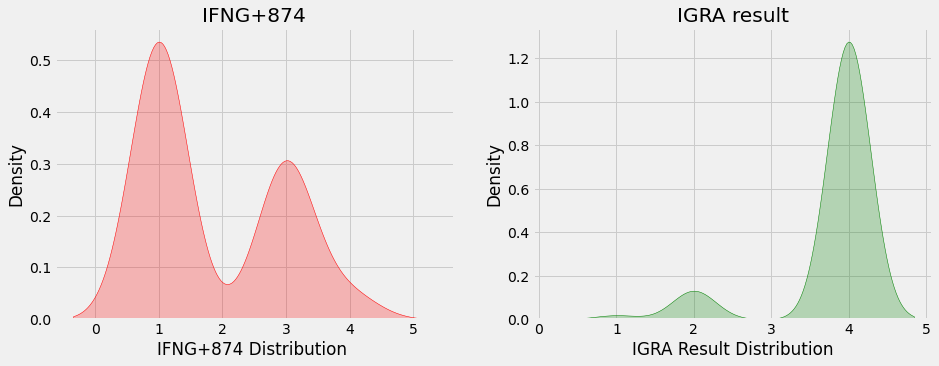

In [10]:
plt.rcParams['figure.figsize'] = (14,5)
plt.subplot(1,2,1)
sns.kdeplot(df['IFNG+874'][df.Group == 1],shade = True,color = "red")
plt.title('IFNG+874')
plt.xlabel('IFNG+874 Distribution ')
plt.subplot(1,2,2)
sns.kdeplot(df['IGRA result'][df.Group == 1],shade = True,color = "green")
plt.title('IGRA result')
plt.xlabel('IGRA Result Distribution')

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\matrix.py:255: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(0.5, 1.0, 'Chart Shows Correlation Among Features   : ')

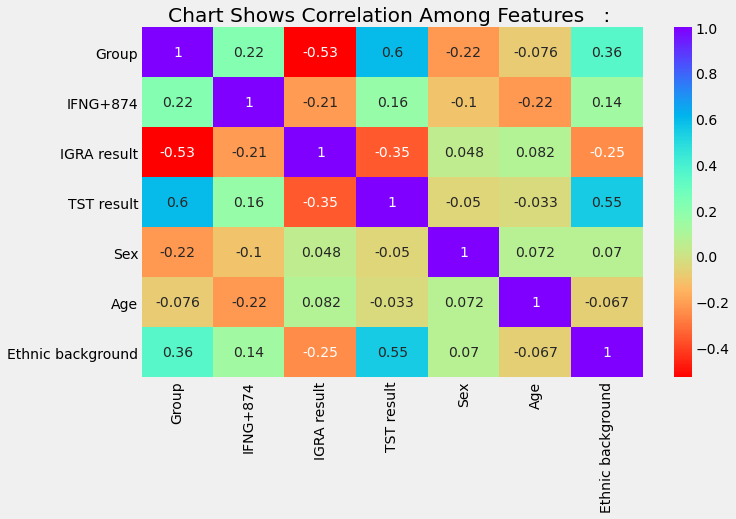

In [11]:
# Let's See The Correlation Among The Features .

# Below chart is used to visualize how one feature is correlated with every other Features Present in the dataset .
# if we have two highly correlated features then we will consider only one of them to avoid overfitting .
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(df.corr(),annot = True ,cmap = 'rainbow_r',annot_kws = {"Size":14})
plt.title( "Chart Shows Correlation Among Features   : ")




# since in our Dataset There is now two  features which are highly correlated ,
# hence we have consider all the features for training our Model .

In [12]:
from scipy.stats import norm, skew
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_features = df[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(15)

,Skew
Age,0.605170
Sex,0.504390
IFNG+874,0.118402
Group,0.033956
Ethnic background,0.000777
IGRA result,-0.486646
TST result,-1.272523


C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a 

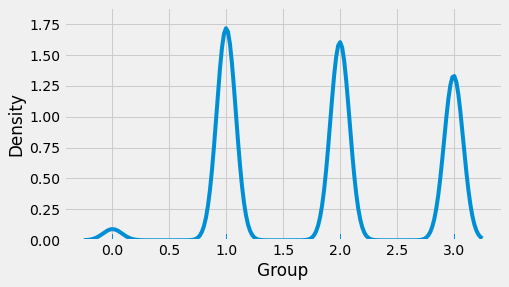

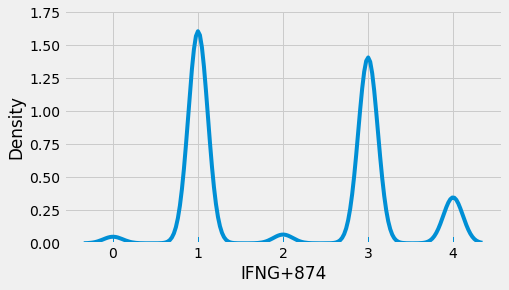

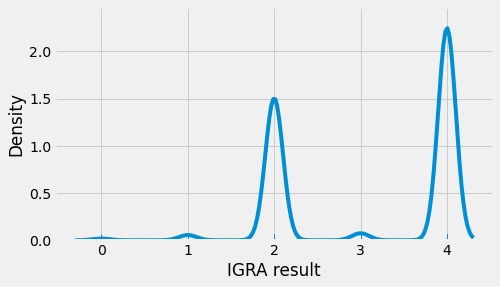

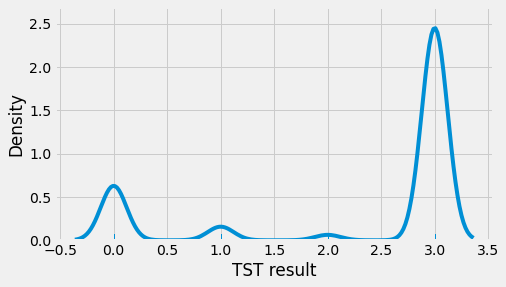

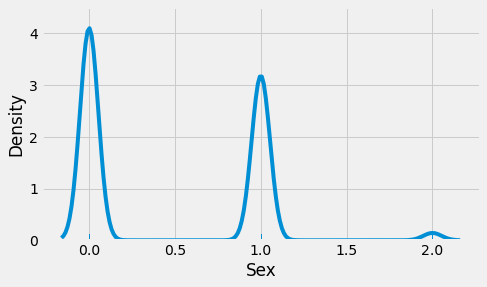

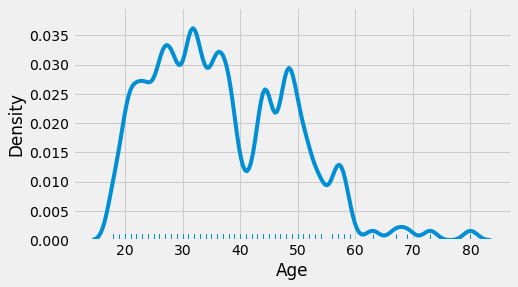

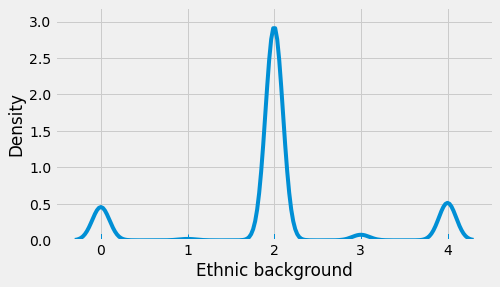

In [13]:
numerical_df = df.select_dtypes(exclude='object')

for i in range(len(numerical_df.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(numerical_df.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_df.columns[i])

<AxesSubplot:>

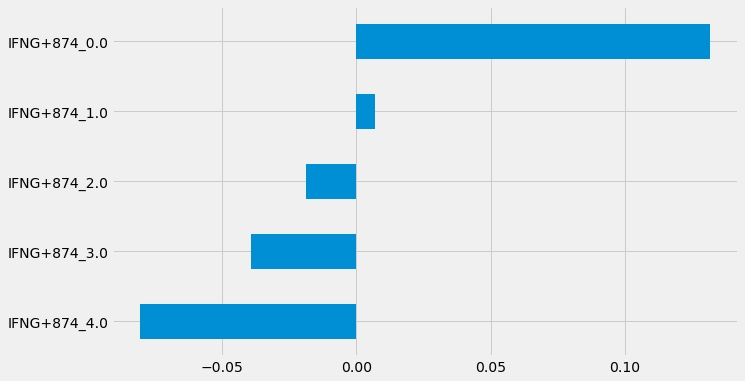

In [18]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

cols_selected = ['IFNG+874']
ohe = OneHotEncoder(cols=cols_selected, use_cat_names=True)
df_t = ohe.fit_transform(df[cols_selected+['Age']])

scaler = MaxAbsScaler()
X = df_t.iloc[:,:-1]
y = df_t.iloc[:, -1].fillna(df_t.iloc[:, -1].mean()) / df_t.iloc[:, -1].max()

mdl = Ridge(alpha=0.1)
mdl.fit(X,y)

pd.Series(mdl.coef_, index=X.columns).sort_values().head(10).plot.barh()

<AxesSubplot:>

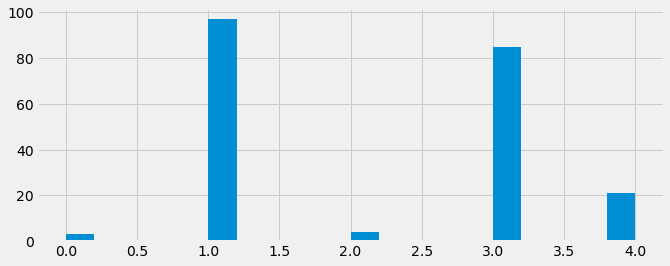

In [19]:
df['IFNG+874'].hist(figsize=(10,4), bins=20)


Text(0.5, 0, 'Group')

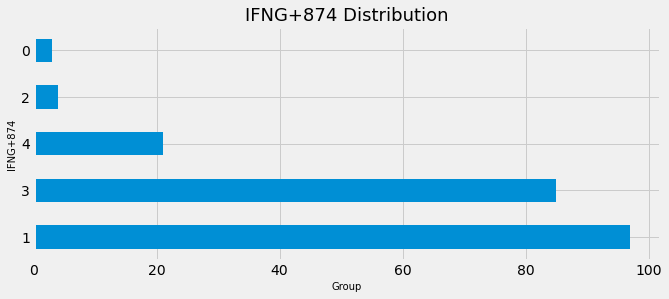

In [20]:
ax = df['IFNG+874'].value_counts().plot.barh(figsize=(10, 4))
ax.set_title('IFNG+874 Distribution', size=18)
ax.set_ylabel('IFNG+874', size=10)
ax.set_xlabel('Group', size=10)

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



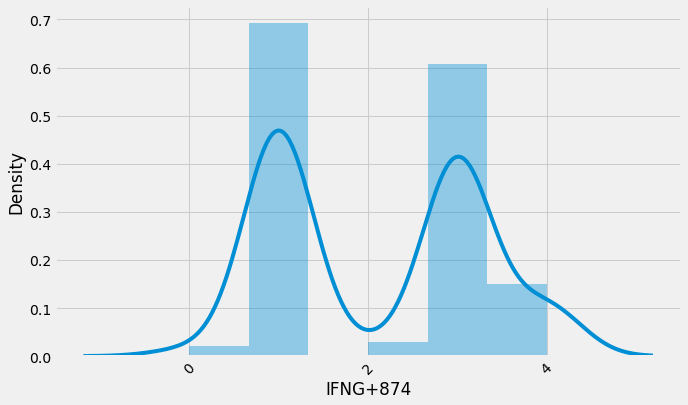

In [21]:
import matplotlib.ticker as ticker
ax = sns.distplot(df['IFNG+874'])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
figsize=(10, 4)

C:\Users\NSC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



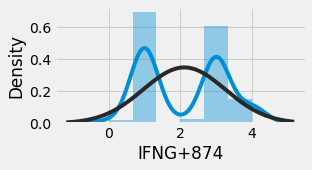

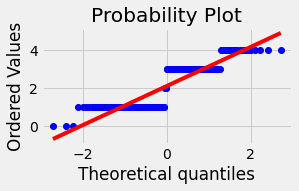

In [22]:
from scipy.stats import norm, skew #for some statistics
import seaborn as sb
from scipy import stats #qqplot
#Lets check the ditribution of the target variable (Placement?)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['IFNG+874'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['IFNG+874'], plot=plt)
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#The data is highly skewed, but since we'll be applying ARIMA, it's fine.
df['IFNG+874'].skew()

0.11925520310416263

In [24]:
df.dtypes

Registry                     object
Group                         int32
IFNG+874                      int32
unstimulated IFN-y pg/ml     object
PHA IFN-y pg/ml              object
Ag IFN-y pg/ml               object
CD3+ number                  object
PHA normalized               object
Ag normalized                object
IGRA result                   int32
TST result                    int32
Sex                           int32
Age                         float64
Ethnic background             int32
dtype: object